In [1]:
import matplotlib.pyplot as plt
import pickle as pk
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score



     age  sex  cp  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal
0     63    1   1    1        2      150      0      2.3      3  0.0   6.0
1     67    1   4    0        2      108      1      1.5      2  3.0   3.0
2     67    1   4    0        2      129      1      2.6      2  2.0   7.0
3     37    1   3    0        0      187      0      3.5      3  0.0   3.0
4     41    0   2    0        2      172      0      1.4      1  0.0   3.0
..   ...  ...  ..  ...      ...      ...    ...      ...    ...  ...   ...
292   57    0   4    0        0      123      1      0.2      2  0.0   7.0
293   45    1   1    0        0      132      0      1.2      2  0.0   7.0
294   68    1   4    1        0      141      0      3.4      2  2.0   7.0
295   57    1   4    0        0      115      1      1.2      2  1.0   7.0
296   57    0   2    0        2      174      0      0.0      2  1.0   3.0

[297 rows x 11 columns]
best classifier__max_iter = 50
best pca__n_components = 2

 Test Score = 0.

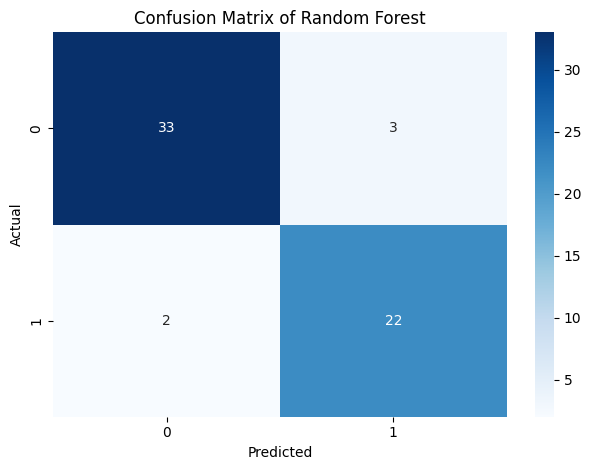

'              precision    recall  f1-score   support\n\n           0       0.94      0.92      0.93        36\n           1       0.88      0.92      0.90        24\n\n    accuracy                           0.92        60\n   macro avg       0.91      0.92      0.91        60\nweighted avg       0.92      0.92      0.92        60\n'

In [2]:
Data = pd.read_csv("selected_features.csv")
X = Data.iloc[:,1:12]
y = Data.iloc[:,12]
seed = 42
print(X)
# Splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=seed,test_size=0.2)

# Create a pipeline with no params in it 
## Study note : Pipeline takes a list of tuples leave everything empty
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca',PCA()),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Parameter Grid
params = {
    'pca__n_components' : [2,3],
    'classifier__max_iter': [50,100,200]
}

# Cross Validation 
Cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = seed)

best_model = GridSearchCV(
    estimator=pipe,
    param_grid = params,
    scoring = 'accuracy',
    verbose = 0 # show the time of computation and score
)

# Create, Train and Make Predictions
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
test_score = best_model.score(X_test,y_test)

for key,value in best_model.best_params_.items(): ## best_model.best_params_ returns a dictionary
    print(f"best {key} = {value}")

print(f"\n Test Score = {test_score:.02f}")

# Generate the confusion matrix for RandomForest
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# Show the plot
plt.tight_layout()
plt.show()

# Classification Report
best_model_report = classification_report(y_true=y_test,y_pred=y_pred)
best_model_report

In [3]:
with open("evaluation_metrics.txt", "a") as f:
    f.write("\nHyperparameter Tunning Supervised Model Evaluation Metrics\n")
    f.write("========================\n")
    f.write(f"Test Score = {test_score:.02f}")
    f.write("\nConfusion Matrix:\n")
    f.write(str(conf_matrix))
    f.write("\n\nClassification Report:\n")
    f.write(best_model_report)
    f.write("-"*100)

- We used logistic as it gave us the best score from supervised aspects among the others
- We reached 92% this is a slight improvement than before

Creating Final Model in pickle format

In [4]:

filename = 'final_model.pkl'
pk.dump(best_model,open(filename,'wb')) # writing the model into filename final_model wb ---> write binary